In [1]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [2]:
# path to the client-hello-cipher-suites.csv file
file_path = '../../../data/attributes/V3/request_attributes/client-hello-cipher-suites.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/TLS/ciphersuite_plots'

## Data Pre-Processing

In [3]:
'''
    dict01 = {<device_name>: <list of cipher suites: 2D list>}
'''
dict01 = {}

with open(file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)

    prev_device = 'erorr: first line in the csv has no device'
    for row in reader:
        print('device:', row[0], end='  |  ')
        print('vals:', row[1], end='  |  \n')

        if row[0] == '':
            if row[1] != '':
                dict01[prev_device].append(row[1].split(','))  # appending because there already exists a list of cipher suites for the device
                print('empty device')
            else:
                continue
                print('both empty')
        else:
            print('both NOT empty')
            dict01[row[0]] = [row[1].split(',')]

        prev_device = row[0]
# print(dict01)

device: AwairAirQuality  |  vals: 006b,00c4,0039,0088,0067,00be,0033,0045,003d,00c0,0035,0084,003c,00ba,002f,0041,0096  |  
both NOT empty
device: LiFXBulb  |  vals: 0035,002f,0004  |  
both NOT empty
device:   |  vals:   |  
device:   |  vals:   |  
device: PixStarPhotoFrame  |  vals: c030,c02c,c028,c024,c014,c00a,c022,c021,00a3,009f,006b,006a,0039,0038,0088,0087,c032,c02e,c02a,c026,c00f,c005,009d,003d,0035,0084,c012,c008,c01c,c01b,0016,0013,c00d,c003,000a,c02f,c02b,c027,c023,c013,c009,c01f,c01e,00a2,009e,0067,0040,0033,0032,009a,0099,0045,0044,c031,c02d,c029,c025,c00e,c004,009c,003c,002f,0096,0041,c011,c007,c00c,c002,0005,0004,0015,0012,0009,0014,0011,0008,0006,0003,00ff  |  
both NOT empty
device:   |  vals:   |  
device:   |  vals:   |  
device: RingDoorBell  |  vals: c014,c011,0039,0035,0005,0004,003c,003d,c027,c023  |  
both NOT empty
device:   |  vals:   |  
device:   |  vals:   |  
device: TPLinkCamera  |  vals: 0039,0038,0035,0016,0013,000a,0033,0032,002f,0007,0005,0004,0015,0

In [4]:
# print(dict01)
for key, val in dict01.items():
    print(f'key: {key}  |  val: {val}')
    

key: AwairAirQuality  |  val: [['006b', '00c4', '0039', '0088', '0067', '00be', '0033', '0045', '003d', '00c0', '0035', '0084', '003c', '00ba', '002f', '0041', '0096']]
key: LiFXBulb  |  val: [['0035', '002f', '0004']]
key: PixStarPhotoFrame  |  val: [['c030', 'c02c', 'c028', 'c024', 'c014', 'c00a', 'c022', 'c021', '00a3', '009f', '006b', '006a', '0039', '0038', '0088', '0087', 'c032', 'c02e', 'c02a', 'c026', 'c00f', 'c005', '009d', '003d', '0035', '0084', 'c012', 'c008', 'c01c', 'c01b', '0016', '0013', 'c00d', 'c003', '000a', 'c02f', 'c02b', 'c027', 'c023', 'c013', 'c009', 'c01f', 'c01e', '00a2', '009e', '0067', '0040', '0033', '0032', '009a', '0099', '0045', '0044', 'c031', 'c02d', 'c029', 'c025', 'c00e', 'c004', '009c', '003c', '002f', '0096', '0041', 'c011', 'c007', 'c00c', 'c002', '0005', '0004', '0015', '0012', '0009', '0014', '0011', '0008', '0006', '0003', '00ff']]
key: RingDoorBell  |  val: [['c014', 'c011', '0039', '0035', '0005', '0004', '003c', '003d', 'c027', 'c023']]
key:

In [5]:
def hex_to_decimal(hex_number):
    try:
        decimal_number = int(hex_number, 16)
        return decimal_number
    except ValueError:
        raise ValueError("Invalid hexadecimal number")

In [6]:
for device, css in dict01.items():
    if len(css) < 1:
        print(f'device: {device} has 0 ciphersuites')
        continue
    for csi, cs in enumerate(css):
        if len(cs) <= 1:
            print(f'device: {device} has 0 ciphersuites')
            continue
        for ci, c in enumerate(cs):
            print(f'device: {device}, csi: {csi}, ci: {ci}, c: {c}, cslen: {len(cs)}')
            dec_val = hex_to_decimal(c)
            print(f'hex_val: {dec_val}')
            # cs[ci] = hex_val
            cs[ci] = math.log2(dec_val)


device: AwairAirQuality, csi: 0, ci: 0, c: 006b, cslen: 17
hex_val: 107
device: AwairAirQuality, csi: 0, ci: 1, c: 00c4, cslen: 17
hex_val: 196
device: AwairAirQuality, csi: 0, ci: 2, c: 0039, cslen: 17
hex_val: 57
device: AwairAirQuality, csi: 0, ci: 3, c: 0088, cslen: 17
hex_val: 136
device: AwairAirQuality, csi: 0, ci: 4, c: 0067, cslen: 17
hex_val: 103
device: AwairAirQuality, csi: 0, ci: 5, c: 00be, cslen: 17
hex_val: 190
device: AwairAirQuality, csi: 0, ci: 6, c: 0033, cslen: 17
hex_val: 51
device: AwairAirQuality, csi: 0, ci: 7, c: 0045, cslen: 17
hex_val: 69
device: AwairAirQuality, csi: 0, ci: 8, c: 003d, cslen: 17
hex_val: 61
device: AwairAirQuality, csi: 0, ci: 9, c: 00c0, cslen: 17
hex_val: 192
device: AwairAirQuality, csi: 0, ci: 10, c: 0035, cslen: 17
hex_val: 53
device: AwairAirQuality, csi: 0, ci: 11, c: 0084, cslen: 17
hex_val: 132
device: AwairAirQuality, csi: 0, ci: 12, c: 003c, cslen: 17
hex_val: 60
device: AwairAirQuality, csi: 0, ci: 13, c: 00ba, cslen: 17
hex_val

In [7]:
# print(dict01)
for key, val in dict01.items():
    print(f'key: {key}  |  val: {val}')

key: AwairAirQuality  |  val: [[6.741466986401147, 7.614709844115208, 5.832890014164741, 7.087462841250339, 6.6865005271832185, 7.569855608330948, 5.672425341971495, 6.108524456778169, 5.930737337562887, 7.584962500721156, 5.727920454563199, 7.044394119358453, 5.906890595608519, 7.539158811108031, 5.554588851677638, 6.022367813028454, 7.22881869049588]]
key: LiFXBulb  |  val: [[5.727920454563199, 5.554588851677638, 2.0]]
key: PixStarPhotoFrame  |  val: [[15.586370695113965, 15.58625339806598, 15.586136091480487, 15.586018775355935, 15.585549415436093, 15.58525598792458, 15.585960113716027, 15.58593078200158, 7.348728154231077, 7.312882955284356, 6.741466986401147, 6.727920454563199, 5.832890014164741, 5.807354922057604, 7.087462841250339, 7.076815597050831, 15.586429340061876, 15.586312047782064, 15.58619474596552, 15.58607743461069, 15.585402709140308, 15.585109251785873, 7.294620748891627, 5.930737337562887, 5.727920454563199, 7.044394119358453, 15.585490734707978, 15.585197295260024

## Plotting

In [8]:
def plot_list_as_line_plt(lst2D, save_name):
    x_values = 0
    for i, cs in enumerate(lst2D):
        if len(cs) <= 1:
            # print(f'case')
            # continue
            return
        x_values = list(range(len(cs)))  # Use list indices as x-axis
        x_values = [x + 1 for x in x_values]
        y_values = cs  # Use list items as y-axis
        
        # general config for plots with more than 1 graph
        if i==0:
            linstl = '-'
            mkr = 'o'
            clr = 'b'
        if i==1:
            linstl = ':'
            mkr = '*'
            clr = 'y'
            
        # specific configs for required devices
        if save_name == 'LiFXBulb':  # LiFXBulb
            linstl = '--'
            mkr = '^'
            clr = 'c'
        elif save_name == 'TPLinkCamera':  # TPLinkCamera
            linstl = '-.'
            mkr = 'x'
            clr = 'r'
        plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    plt.xlabel('Index of the offered list')
    plt.ylabel('Log base 2 of the decimal equivalent of the hex code')
    # plt.title('Line Plot from List')
    plt.grid(True)

    if len(x_values) <= 25:
        plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    elif len(x_values) <= 50:
        x_values = np.array(x_values)
        even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
        plt.xticks(even_xticks)
    elif len(x_values) <= 75:
        x_values = np.array(x_values)
        even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
        plt.xticks(even_xticks)
    elif len(x_values) <= 100:
        x_values = np.array(x_values)
        even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
        plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


device_name: AwairAirQuality


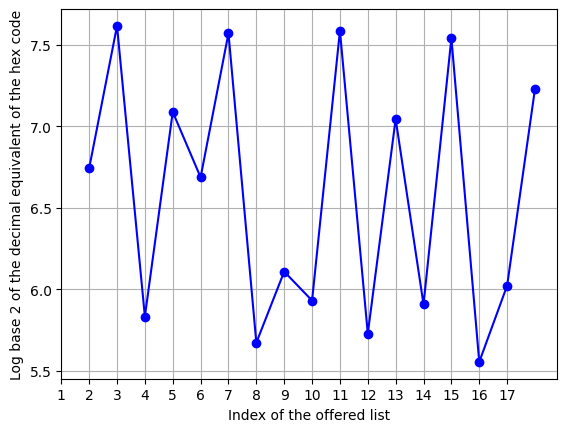

device_name: LiFXBulb


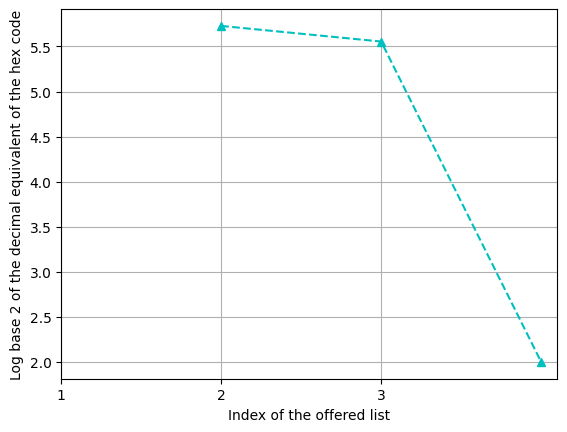

device_name: PixStarPhotoFrame


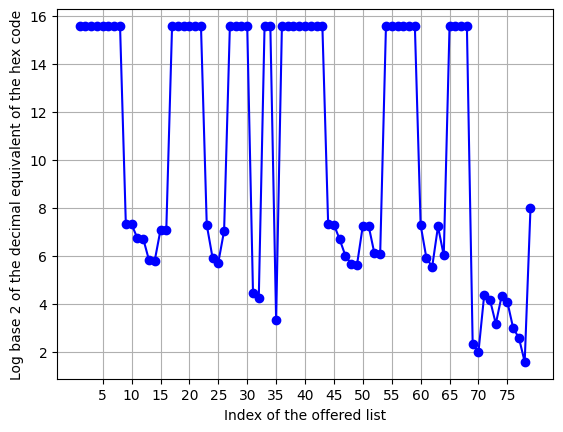

device_name: RingDoorBell


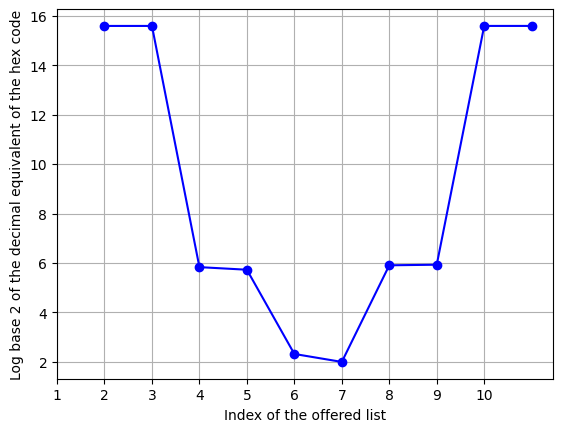

device_name: TPLinkCamera


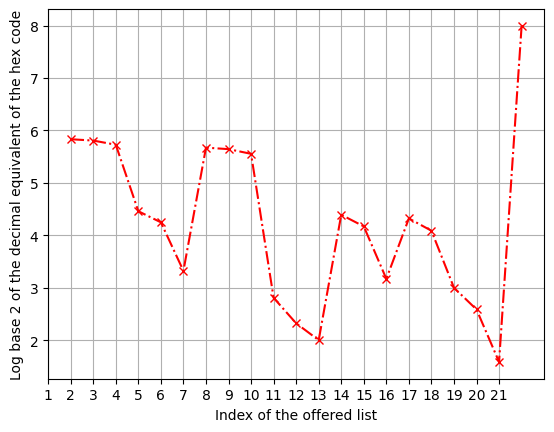

device_name: TribySpeaker


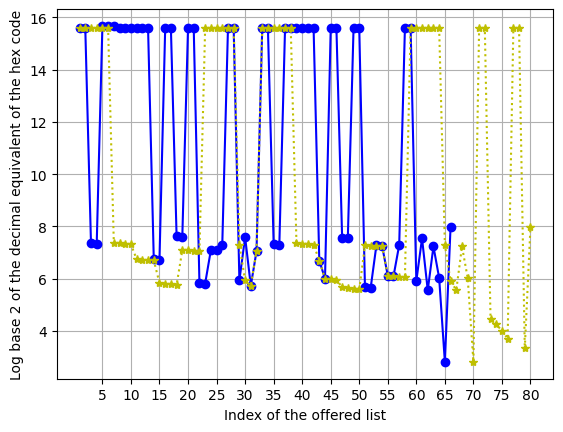

device_name: AmazonEcho


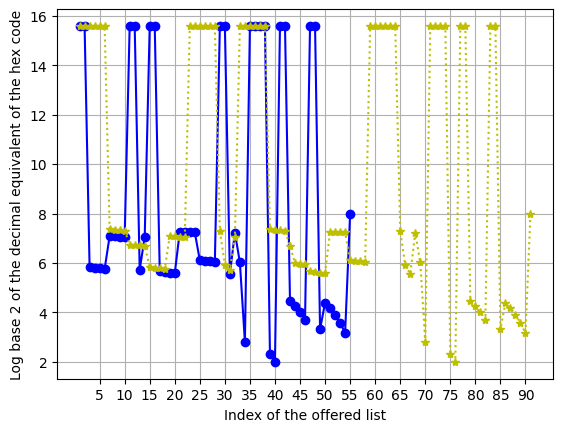

device_name: NestProtect
device_name: WithingsSleepSensor
device_name: SamsungCamera


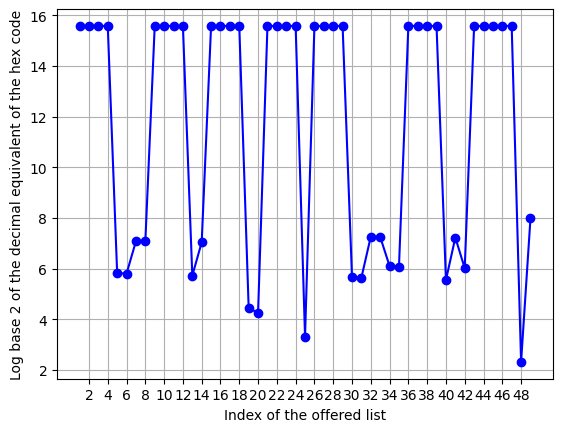

device_name: WithingsBabyMonitor


In [9]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in dict01.items():
    device_name = device
    if '/' in device:
        device_name = device.split('/')[0]

    if device_name in printed_devices:
        continue  
    print(f'device_name: {device_name}')
    plot_list_as_line_plt(css, device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)